In [264]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from nltk.tokenize import word_tokenize

In [265]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/vineeth/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [266]:
r=requests.get('https://seekingalpha.com/article/4500172-pros-cons-investing-meta-platforms-stock')

In [267]:
r.encoding = 'utf-8'

In [268]:
html = r.text

In [269]:
print(html[:100])

<!doctype html><html lang="en" prefix="og: https://ogp.me/ns#" style="--headerFullHeight: 90px; --he


In [270]:
soup = BeautifulSoup(html)
text = soup.get_text()

In [271]:
len(text)


9030

In [272]:
print(text[:1100])

Pros And Cons Of Investing In Meta Platforms Stock (NASDAQ:FB) | Seeking AlphaSeeking Alpha - Go to HomepageTrendingMy PortfolioMy AuthorsTop StocksLatest NewsMarketsStock IdeasDividendsETFsEducationWatch & ListenLong IdeasTechPros And Cons Of Investing In Meta Platforms StockApr. 07, 2022 9:00 AM ETMeta Platforms, Inc. (FB)20 Comments10 LikesJulian LinMarketplaceFollowSummaryMeta Platforms, formerly known as Facebook, has had an "about face" in the last several months.The company is facing headwinds ranging from Apple's data privacy changes to fierce competition.On top of those headwinds, the company is investing heavily in the metaverse, which held back income by $10 billion in 2021.I rate the stock a strong buy as one of my higher conviction ideas.Looking for a portfolio of ideas like this one? Members of Best Of Breed get exclusive access to our model portfolio. Learn More »     Chip Somodevilla/Getty Images NewsMeta Platforms (NASDAQ:FB) has seen stock sentiment swing from being a

In [273]:
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")   
clean_text= clean_text.replace(",", " ")
clean_text= ''.join([c for c in clean_text if c != "'"])

In [274]:
clean_text

'Pros And Cons Of Investing In Meta Platforms Stock (NASDAQ:FB) | Seeking AlphaSeeking Alpha - Go to HomepageTrendingMy PortfolioMy AuthorsTop StocksLatest NewsMarketsStock IdeasDividendsETFsEducationWatch & ListenLong IdeasTechPros And Cons Of Investing In Meta Platforms StockApr. 07  2022 9:00 AM ETMeta Platforms  Inc. (FB)20 Comments10 LikesJulian LinMarketplaceFollowSummaryMeta Platforms  formerly known as Facebook  has had an "about face" in the last several months.The company is facing headwinds ranging from Apples data privacy changes to fierce competition.On top of those headwinds  the company is investing heavily in the metaverse  which held back income by $10 billion in 2021.I rate the stock a strong buy as one of my higher conviction ideas.Looking for a portfolio of ideas like this one? Members of Best Of Breed get exclusive access to our model portfolio. Learn More »     Chip Somodevilla Getty Images NewsMeta Platforms (NASDAQ:FB) has seen stock sentiment swing from being a

In [275]:
stopwords = nltk.corpus.stopwords.words('english')
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    tokens = word_tokenize((sent.text.strip()))
    new_sentence = []
    for word in tokens:
        if word not in stopwords:
            new_sentence.append(word)
    sentence.append(' '.join(new_sentence))

In [276]:
print(len(sentence))

76


In [277]:
print(sentence[4])

On top headwinds company investing heavily metaverse held back income $ 10 billion 2021.I rate stock strong buy one higher conviction ideas .


In [278]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [279]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [280]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,Pros And Cons Of Investing In Meta Platforms S...,0.000000,0.000000
1,IdeasTechPros And Cons Of Investing In Meta Pl...,0.000000,0.000000
2,07 2022 9:00 AM ETMeta Platforms Inc. ( FB ) 2...,0.000000,0.022222
3,The company facing headwinds ranging Apples da...,0.000000,0.000000
4,On top headwinds company investing heavily met...,0.196667,0.446667


In [281]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      76 non-null     object 
 1   Polarity      76 non-null     float64
 2   Subjectivity  76 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [283]:
import re

In [284]:
new_clean_text = re.sub(r'[^\w]', ' ', clean_text)

In [285]:
tokens = word_tokenize(new_clean_text)

In [286]:
print(tokens)

['Pros', 'And', 'Cons', 'Of', 'Investing', 'In', 'Meta', 'Platforms', 'Stock', 'NASDAQ', 'FB', 'Seeking', 'AlphaSeeking', 'Alpha', 'Go', 'to', 'HomepageTrendingMy', 'PortfolioMy', 'AuthorsTop', 'StocksLatest', 'NewsMarketsStock', 'IdeasDividendsETFsEducationWatch', 'ListenLong', 'IdeasTechPros', 'And', 'Cons', 'Of', 'Investing', 'In', 'Meta', 'Platforms', 'StockApr', '07', '2022', '9', '00', 'AM', 'ETMeta', 'Platforms', 'Inc', 'FB', '20', 'Comments10', 'LikesJulian', 'LinMarketplaceFollowSummaryMeta', 'Platforms', 'formerly', 'known', 'as', 'Facebook', 'has', 'had', 'an', 'about', 'face', 'in', 'the', 'last', 'several', 'months', 'The', 'company', 'is', 'facing', 'headwinds', 'ranging', 'from', 'Apples', 'data', 'privacy', 'changes', 'to', 'fierce', 'competition', 'On', 'top', 'of', 'those', 'headwinds', 'the', 'company', 'is', 'investing', 'heavily', 'in', 'the', 'metaverse', 'which', 'held', 'back', 'income', 'by', '10', 'billion', 'in', '2021', 'I', 'rate', 'the', 'stock', 'a', 'str

In [287]:
words = []

for word in tokens:
    words.append(word.lower())

In [288]:
words[:15]

['pros',
 'and',
 'cons',
 'of',
 'investing',
 'in',
 'meta',
 'platforms',
 'stock',
 'nasdaq',
 'fb',
 'seeking',
 'alphaseeking',
 'alpha',
 'go']

In [289]:
stopwords = nltk.corpus.stopwords.words('english')

In [290]:
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [291]:
words_new[:100]

['pros',
 'cons',
 'investing',
 'meta',
 'platforms',
 'stock',
 'nasdaq',
 'fb',
 'seeking',
 'alphaseeking',
 'alpha',
 'go',
 'homepagetrendingmy',
 'portfoliomy',
 'authorstop',
 'stockslatest',
 'newsmarketsstock',
 'ideasdividendsetfseducationwatch',
 'listenlong',
 'ideastechpros',
 'cons',
 'investing',
 'meta',
 'platforms',
 'stockapr',
 '07',
 '2022',
 '9',
 '00',
 'etmeta',
 'platforms',
 'inc',
 'fb',
 '20',
 'comments10',
 'likesjulian',
 'linmarketplacefollowsummarymeta',
 'platforms',
 'formerly',
 'known',
 'facebook',
 'face',
 'last',
 'several',
 'months',
 'company',
 'facing',
 'headwinds',
 'ranging',
 'apples',
 'data',
 'privacy',
 'changes',
 'fierce',
 'competition',
 'top',
 'headwinds',
 'company',
 'investing',
 'heavily',
 'metaverse',
 'held',
 'back',
 'income',
 '10',
 'billion',
 '2021',
 'rate',
 'stock',
 'strong',
 'buy',
 'one',
 'higher',
 'conviction',
 'ideas',
 'looking',
 'portfolio',
 'ideas',
 'like',
 'one',
 'members',
 'best',
 'breed',

In [292]:
res=' '.join([i for i in words_new if not i.isdigit()])

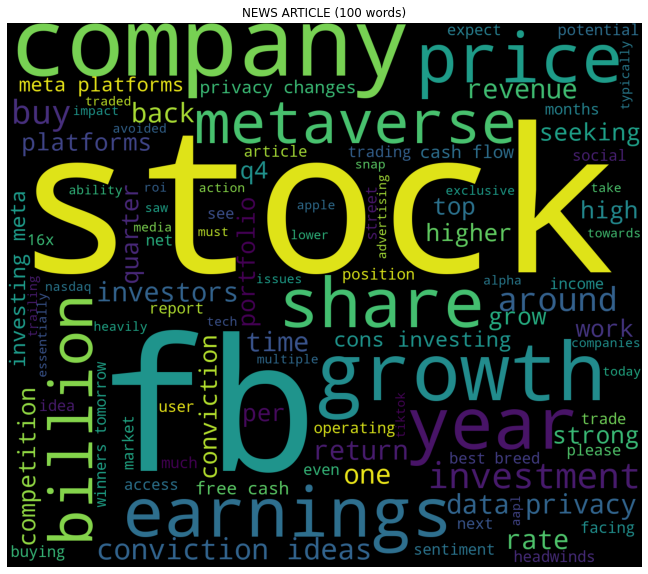

In [293]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

In [294]:
df_textblob.to_csv('fb_analysis.csv', index=False)